# Introduction 

## What is logistic Regression? 

A logistic regression is a classification algorithm. Mostly used when the response variable is binary. However, multiple response variables is also possible. 

1. Should the response variable be a number or can be a text also? 

It should be a number. 

2. What is the output of logistic regression? - Number or probabilities? 

Probabilities. 

3. Is it a supervised or unsupervised learning alogithm? 

It is a supervised machine learning algorithm as it has labelled response vaiable. And a response variable is present. 

4. Why linear regression cannot be used here? 

The output of a linear regression model falls on a real line. It is not bound between 0-1 as probabilities should be bound. Here, we are trying to figure out the probability of 1. So can't be used. 

5. Logistic Regression is an improvisation over linear regression. Instead of a straight line, this is a sigmoid function. It's an s-curve. As we are implyfying a real life situation to a sigmoid curve, we are introducing bias in the model.

Ideally, it should be a step function. 

Probability of success is given by this equation :


**Log of odds:**

odds means the probability of success by prbability of failure. 

so odds = (p/1-p)

by substituting it in the  equation, we get that log of odds is a linear function. 

**Questions**

Can odds be >1?

Can odds be negative? Why? 

Can odds be 0? why? 

can odds be 1? why? 


**Note**:
When we get the probability as an output, we set a threshold : Always buisness sets the threshold. 

# Binary Logistic Regression 

The response variable is a binary variable. We use MLE to estimate the parameters. 

We can't use OLS for that.

why? 

The parameters of a logistic regression model can be estimated by the probabilistic framework called maximum likelihood estimation. Under this framework, a probability distribution for the target variable (class label) must be assumed and then a likelihood function defined that calculates the probability of observing the outcome given the input data and the model.

Let's understand MLE better. 

Link to blog: 



In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#import dataset from CSV file on Github
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

In [3]:
data.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [4]:
len(data.index) #10k ROWS In the data set. 
#Default is our target variable. 

10000

We will use student status, bank balance, and income to build a logistic regression model that predicts the probability that a given individual defaults.

In [5]:
#define the predictor variables and the response variable
X = data[['student', 'balance', 'income']]
y = data['default']

In [6]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [7]:
#instantiate the model
log_regression = LogisticRegression()

In [8]:
#fit the model using the training data
log_regression.fit(X_train,y_train)

LogisticRegression()

In [15]:
#use model to make predictions on test data
y_pred = log_regression.predict(X_test)

In [16]:
y_pred # These are the classifications 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

array([[2870,   17],
       [  93,   20]], dtype=int64)

In [17]:
log_regression.predict_proba(X_test)

array([[9.99810674e-01, 1.89326075e-04],
       [9.99857231e-01, 1.42768942e-04],
       [9.94284183e-01, 5.71581735e-03],
       ...,
       [8.46201821e-01, 1.53798179e-01],
       [9.98895042e-01, 1.10495803e-03],
       [9.99314648e-01, 6.85351703e-04]])

In the matrix above, each row corresponds to a single observation. The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). The second column is the probability that the output is one, or 𝑝(𝑥).

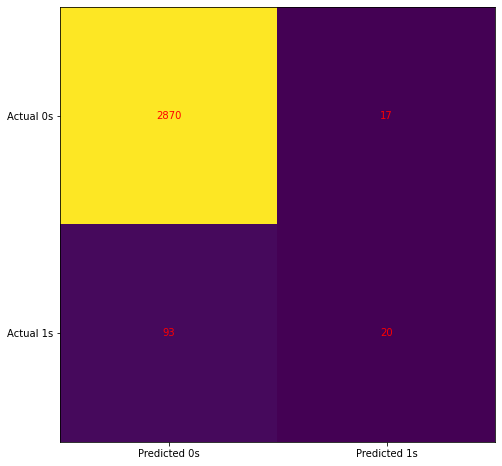

In [22]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Source: realpython.com

From the confusion matrix we can see that:

#True positive predictions: 2870

#True negative predictions: 20

#False positive predictions: 93

#False negative predictions: 17

##### Actuals -Left 

##### Predicted - Top 

In [23]:
print(classification_report(y_test, y_pred)) # Gives a more comprehensive report 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2887
           1       0.54      0.18      0.27       113

    accuracy                           0.96      3000
   macro avg       0.75      0.59      0.62      3000
weighted avg       0.95      0.96      0.95      3000



In [11]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9633333333333334


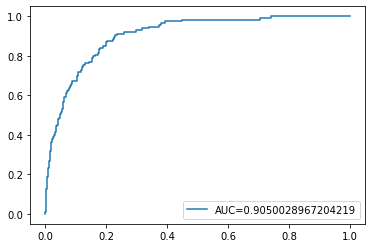

In [12]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1] # This gives the probabilities of our target variable : 1 
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc)) #For representing area under the curve. 
plt.legend(loc=4)
plt.show()

In [13]:
log_regression.predict_proba(X_test)

array([[9.99810674e-01, 1.89326075e-04],
       [9.99857231e-01, 1.42768942e-04],
       [9.94284183e-01, 5.71581735e-03],
       ...,
       [8.46201821e-01, 1.53798179e-01],
       [9.98895042e-01, 1.10495803e-03],
       [9.99314648e-01, 6.85351703e-04]])

##### Source : https://www.statology.org/logistic-regression-python/

# Stats Models - More useful  

In [25]:
#import numpy as np
#import statsmodels.api as sm

In [ ]:
#model = sm.Logit(y, x)
#result = model.fit(method='newton')
#result.params
#result.params
#.summary() and .summary2() get output data that you might find useful in some circumstances